# Практическое занятие № 11

# Парсинг данных

В общем случае парсинг – это синтаксический анализ, позволяющий извлечь структурированные данные из неструктурированных или полуструктурированных данных. В отношении анализа данных парсинг предполагает распознавание данных во внешних источниках для дальнейшего использования. При помощи парсинга данные извлекаются из неструктурированных документов, таких как web-страницы в файлах `.html`, текстовые файлы, JSON, XML и другие источники данных.

## 1. Модуль `requests`

Requests — это библиотека на базе встроенного пакета urllib, которая позволяет легко отправлять различные веб-запросы, а также управлять кукисами и сессиями, авторизацией и автоматической организацией пула соединений.


In [11]:
import pandas as pd

Для обработки запросов к серверам:

In [2]:
import requests

Для синтаксического анализа `.html`:

In [3]:
import lxml
from bs4 import BeautifulSoup

Рассмотрим для примера сайт со статистикой по коронавирусу, доступный по следующему URL:

In [4]:
url = 'https://www.worldometers.info/coronavirus/'

Создадим объект для загрузки и получим доступ для скачивания с сайта:

In [5]:
page = requests.get(url)

page.text[:1000]

'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n\n\n\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n\n    <title>COVID - Coronavirus Statistics - Worldometer</title>\n    <meta name="description" content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates.">\n\n\n    \n\t<!-- Favicon -->\n\t<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n\t<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n\t<link rel="apple-touch-icon" sizes="60x60" href="/favicon/apple-icon-60x60.png">\n\t<link rel="apple-touch-icon" sizes="72x72" href="/favicon/apple-icon-72x72.png">\n\t<lin

Однако, не все все сайты предоставляют доступ парсерам:

In [7]:
requests.get('https://www.gismeteo.ru')

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

В некоторых случаях можно воспользоваться API, предоставляемыми сервером

Обработаем полученную страницу модулем `lxml`:

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID - Coronavirus Statistics - Worldometer</title>
<meta content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates." name="description"/>
<!-- Favicon -->
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
<link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/favicon/apple-icon-76x76.png" rel="apple-touch-icon" siz
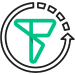
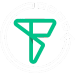
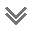

In [8]:
soup = BeautifulSoup(page.text, 'lxml')

soup

Для поиска таблицы на странице необходимо понимать структуру web-страниц, а также как таблицы отображаются в `.html.` 

## 2. Структура документа `.html`

Документ `.html` имеет древовидную структуру с вложенными объектами. Некоторые объекты имеют фиксированные имена, другие разработчик может задавать сам.

Так выглядит "пустой" документ `.html`. "Пустой" потому что в браузере не будет отображаться ничего. Оне не выводит контент, но содержит обязательные сервисные элементы. Если чего-то не будет хватать, то браузер может "дорисовать" остальное по умолчанию. Язык разметки `.html` формирует отображения, поэтому использует определенные вольности.

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Document</title>
</head>
<body>


</body>
</html>

Объекты в `.html` задаются тегами – ключевыми словами в треугольных скобках (`<` `>`). 

Некоторые теги, например тег таблицы `<table>`, - парные. Они определяют начало и конец объекта. 

Некоторые примеры использования тегов приведены ниже:

|HTML тег|Описание|
|:-|:-|
|`<!DOCTYPE html>`|Версия HTML для браузера |
|`<!-- … -->`|Комментарий. Не отображается. Для себя, чтоб не забыть|
|`<html>… </html>`|Содержит всю страницу, включая head и body. Браузер игнорирует все вне этого тега|
|`<head>…</head>`|Хранит настройки и метаданные для браузера|
|`<body>…</body>`|Содержит отображаемый контент страницы|
|`<meta charset="UTF-8">`|`<head>` Русский язык на странице|
|`<title>… </title>`|`<head>` Название страницы в браузере. До 40 символов|
|`<h1>…</h1>`, `<h2>…</h2>`, ..., `<h6>…</h6>`|Заголовок определенного уровня (1 - 6). Блочный – автоматически отделяется сверху и снизу от остального контента. В нем поисковики ищут, о чём страница|
|`<p>…</p>`|Обычный абзац текста|
|`<br>, </br>`|Перенос строки в тексте|
|`<b>…</b>`|Абзац текста, напечатанный жирным шрифтом|
|`<i>…</i>`|Абзац текста, напечатанный  курсивом|
|`<p align=”center”>…</p>`|Абзац текста, отформатированного «по центру». Работает и с другими тегами. Поддерживает «left», «right», «center», «justify»|
|`<a href="a.com/site.html">Переход на страницу </a>`|Вставить переход по ссылке `a.com/site.html`. На сайте отображается текст «Переход на страницу». Строчный тег – можно продолжить вписывать текст|
|`<a href="a.com/site.html" target="blank">на site.html</a>`|Вставить переход по ссылке `a.com/site.html` в новом окне|
|`<img src="img/imalisa1.jpg" width="150px" height="150px" alt="Nope">`|Вставка рисунка из папки `img/`. Ширина и высота будут масштабироваться к `150` пикселов. Параметр `alt` обязателен. Он на случай, если не подгрузится рисунок. Рисунок можно вставлять внутрь ссылки. Если указать только ширину или высоту, будут сохранены пропорции|
|`<ul>`|Список. Элементы списка задаются `<li>…</li>`|
|`<li>…</li>`|Вид задается `type="…"`.|
|`</ul>`|Закрывающий тег списка.|
|`<ol>`|Нумерованный список.|
|`<li>…</li>`|`type = A` - использовать большие латинские буквы; |
|…|`type = a` - использовать маленькие буквы; |
|`</ol>`|`type = I` - использовать большие римские цифры; |
||`type = i`- использовать маленькие римские цифры; |
||`type = 1` - использовать арабские цифры|
||Атрибут `start=` определяет начальное значение списка (десятичное число), например `start=5`.|

    
Таблица в `.html` будет содержаться между тегами `<table>` и `</table>`. 

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Table Example</title>
</head>
<body>
  <table border=1 id="table1">
    <tr>
      <th>1st</th>
      <th>2nd</th>
      <th>3rd</th>
    </tr>
    <tr>
      <td>1-1</td>
      <td>1-2</td>
      <td>1-3</td>
    </tr>
    <tr>
      <td>2-1</td>
      <td>2-2</td>
      <td>2-3</td>
    </tr>
  </table>
</body>
</html>


Отображаемая часть .html документа содержится в body, то есть между открывающим `<body>` и закрывающим тегами `</body>`.

Отступы определяют вложенность объектов. В `.html` они необязательны, однако большинство браузеров и сред ля web-разработки из поддерживают для удобочитаемости. 

Как видно из структуры документа, внутри body находится объект `table` – таблица. Она также имеет свою структуру. 

Таблицы верстаются построчно. Строка определяется тегами `<tr>` и `</tr>`.

Внутри каждой строки находятся ячейки `<th>` и `</th>` для строк заголовков и `<td>` и `</td>` для обычных строк. Между этими тегами размещается содержимое ячеек. 

У некоторых объектов внутри открывающего тега могут быть идентификаторы `id`, имеющие уникальные значения, по которым их можно идентифицировать в документе.


Найдем интересующую нас таблицу на `web`-странице со статистикой по коронавирусу. Для этого выберем в контекстном меню «Просмотреть код страницы» и найдем в исходном тексте тег `<table>`. Это наша таблица, которая имеет идентификатор `id='main_table_countries_today'`. Извлечем таблицу при помощи парсера:
 

In [38]:
table1 = soup.find('table', id='main_table_countries_today')

table1

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

In [39]:
table1.find_all('th')#.text

[<th width="1%">#</th>,
 <th width="100">Country,<br/>Other</th>,
 <th width="20">Total<br/>Cases</th>,
 <th width="30">New<br/>Cases</th>,
 <th width="30">Total<br/>Deaths</th>,
 <th width="30">New<br/>Deaths</th>,
 <th width="30">Total<br/>Recovered</th>,
 <th width="30">New<br/>Recovered</th>,
 <th width="30">Active<br/>Cases</th>,
 <th width="30">Serious,<br/>Critical</th>,
 <th width="30">Tot Cases/<br/>1M pop</th>,
 <th width="30">Deaths/<br/>1M pop</th>,
 <th width="30">Total<br/>Tests</th>,
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>,
 <th width="30">Population</th>,
 <th style="display:none" width="30">Continent</th>,
 <th width="30">1 Case<br/>every X ppl</th>,
 <th width="30">1 Death<br/>every X ppl</th>,
 <th width="30">1 Test<br/>every X ppl</th>,
 <th width="30">New Cases/1M pop</th>,
 <th width="30">New Deaths/1M pop</th>,
 <th width="30">Active Cases/1M pop</th>]

Создадим список для заголовков столбцов:

In [43]:
list(map(lambda x: x.text, table1.find_all('th')))

['#',
 'Country,Other',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'Serious,Critical',
 'Tot\xa0Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/\n1M pop\n',
 'Population',
 'Continent',
 '1 Caseevery X ppl',
 '1 Deathevery X ppl',
 '1 Testevery X ppl',
 'New Cases/1M pop',
 'New Deaths/1M pop',
 'Active Cases/1M pop']

In [45]:
headers = []
for i in table1.find_all('th'):
    title = i.text
    headers.append(title)

headers


['#',
 'Country,Other',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'Serious,Critical',
 'Tot\xa0Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/\n1M pop\n',
 'Population',
 'Continent',
 '1 Caseevery X ppl',
 '1 Deathevery X ppl',
 '1 Testevery X ppl',
 'New Cases/1M pop',
 'New Deaths/1M pop',
 'Active Cases/1M pop']

Просмотр содержимого списка показывает, что некоторые заголовки содержат спецсимволы, которые могут в дальнейшем создать проблемы при адресации к столбцам. Выполним замены: 

In [48]:
headers = ['#',
 'Country, Other',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'Serious, Critical',
 'Total Cases per 1M pop',
 'Deaths per 1M pop',
 'Total Tests',
 'Tests per 1M pop',
 'Population',
 'Continent',
 '1 Case every X ppl',
 '1 Death every X ppl',
 '1 Test every X ppl',
 'New Cases per 1M pop',
 'New Deaths per 1M pop',
 'Active Cases per 1M pop']

Создадим объект DataFrame из полученных данных:
 

In [51]:
data = pd.DataFrame(columns=headers)

data

,#,"Country, Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious, Critical",...,Total Tests,Tests per 1M pop,Population,Continent,1 Case every X ppl,1 Death every X ppl,1 Test every X ppl,New Cases per 1M pop,New Deaths per 1M pop,Active Cases per 1M pop


Заполним структуру данными: 

In [54]:
table1.find_all('tr')[1].find_all('td')[6].text

'127,665,129'

In [56]:
rows = table1.find_all('tr')
for row in rows[1:]:
    row_data = row.find_all('td')
    df = []
    for cell in row_data:
        info = cell.text.replace(',', '').strip()
        df.append(info)
    
    df_ = pd.DataFrame([df], columns=data.columns)
    data = pd.concat((data, df_), axis=0)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 0 to 0
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   #                        247 non-null    object
 1   Country, Other           247 non-null    object
 2   TotalCases               247 non-null    object
 3   NewCases                 247 non-null    object
 4   TotalDeaths              247 non-null    object
 5   NewDeaths                247 non-null    object
 6   TotalRecovered           247 non-null    object
 7   NewRecovered             247 non-null    object
 8   ActiveCases              247 non-null    object
 9   Serious, Critical        247 non-null    object
 10  Total Cases per 1M pop   247 non-null    object
 11  Deaths per 1M pop        247 non-null    object
 12  Total Tests              247 non-null    object
 13  Tests per 1M pop         247 non-null    object
 14  Population               247 non-null    object
 

In [60]:
data.head(30)

,#,"Country, Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious, Critical",...,Total Tests,Tests per 1M pop,Population,Continent,1 Case every X ppl,1 Death every X ppl,1 Test every X ppl,New Cases per 1M pop,New Deaths per 1M pop,Active Cases per 1M pop
0,,North America,131889132,,1695941,,127665129,+350,2528062,6095,...,,,,North America,,,,,,
0,,Asia,221500265,,1553662,,205673091,,14273512,14733,...,,,,Asia,,,,,,
0,,Europe,253406198,,2101824,,248754104,+474,2550270,4453,...,,,,Europe,,,,,,
0,,South America,70200879,,1367332,,66683585,,2149962,8953,...,,,,South America,,,,,,
0,,Oceania,14895771,,33015,,14752388,,110368,31,...,,,,Australia/Oceania,,,,,,
0,,Africa,12860924,,258892,,12090808,,511224,529,...,,,,Africa,,,,,,
0,,,721,,15,,706,,0,0,...,,,,,,,,,,
0,,World,704753890,0,7010681,0,675619811,+790,22123398,34794,...,,,,All,,,,,,
0,1,USA,111820082,,1219487,,109814428,,786167,940,...,1186851502,3544901,334805269,North America,3,275,0,,,2348
0,2,India,45035393,,533570,,N/A,N/A,N/A,N/A,...,935879495,665334,1406631776,Asia,31,2636,2,,,0.4


In [62]:
ind = data[data['#'] == ''].index
data = data.drop(ind, axis=0)
data = data.reset_index(drop=True)

In [64]:
curr_row = 1
for row in table1.find_all('tr')[curr_row:]:
    row_data = row.find_all('td')
    df_row = []
    for cell in row_data:
        df_row.append(cell.text.strip().replace(',',''))
    data.loc[curr_row] = df_row
    curr_row += 1

pd.set_option('display.max_columns', None)

In [66]:
data

,#,"Country, Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious, Critical",Total Cases per 1M pop,Deaths per 1M pop,Total Tests,Tests per 1M pop,Population,Continent,1 Case every X ppl,1 Death every X ppl,1 Test every X ppl,New Cases per 1M pop,New Deaths per 1M pop,Active Cases per 1M pop
1,,North America,131889132,,1695941,,127665129,+350,2528062,6095,,,,,,North America,,,,,,
2,,Asia,221500265,,1553662,,205673091,,14273512,14733,,,,,,Asia,,,,,,
3,,Europe,253406198,,2101824,,248754104,+474,2550270,4453,,,,,,Europe,,,,,,
4,,South America,70200879,,1367332,,66683585,,2149962,8953,,,,,,South America,,,,,,
5,,Oceania,14895771,,33015,,14752388,,110368,31,,,,,,Australia/Oceania,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,,Total:,70200879,,1367332,,66683585,,2149962,8953,,,,,,South America,,,,,,
244,,Total:,14895771,,33015,,14752388,,110368,31,,,,,,Australia/Oceania,,,,,,
245,,Total:,12860924,,258892,,12090808,,511224,529,,,,,,Africa,,,,,,
246,,Total:,721,,15,,706,,0,0,,,,,,,,,,,,


Выполним чистку таблицы. Очевидно, нам не нужен столбец  ‘#’, а также некоторые строки, содержащие итоги и агрегированную информацию: 

In [69]:
data.drop("#", inplace=True, axis=1)
data.drop(data.index[0:8], inplace=True)
data.reset_index(inplace=True, drop = True)
data.drop(data.index[230:238], inplace=True)
data.head(10)

,"Country, Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious, Critical",Total Cases per 1M pop,Deaths per 1M pop,Total Tests,Tests per 1M pop,Population,Continent,1 Case every X ppl,1 Death every X ppl,1 Test every X ppl,New Cases per 1M pop,New Deaths per 1M pop,Active Cases per 1M pop
0,USA,111820082,,1219487,,109814428,,786167,940,333985,3642,1186851502,3544901,334805269,North America,3,275,0,,,2348
1,India,45035393,,533570,,N/A,N/A,N/A,N/A,32016,379,935879495,665334,1406631776,Asia,31,2636,2,,,0.4
2,France,40138560,,167642,,39970918,,0,,612013,2556,271490188,4139547,65584518,Europe,2,391,0,,,
3,Germany,38828995,,183027,,38240600,,405368,N/A,462891,2182,122332384,1458359,83883596,Europe,2,458,1,,,4833
4,Brazil,38743918,,711380,,36249161,,1783377,N/A,179908,3303,63776166,296146,215353593,South America,6,303,3,,,8281
5,S. Korea,34571873,,35934,,34535939,,0,,673523,700,15804065,307892,51329899,Asia,1,1428,3,,,
6,Japan,33803572,,74694,,N/A,N/A,N/A,N/A,269169,595,100414883,799578,125584838,Asia,4,1681,1,,,95582
7,Italy,26723249,,196487,,26361218,,165544,22,443445,3261,281126449,4665010,60262770,Europe,2,307,0,,,2747
8,UK,24910387,,232112,,24678275,,0,N/A,363666,3389,522526476,7628357,68497907,Europe,3,295,0,,,
9,Russia,24124215,,402756,,23545818,,175641,N/A,165454,2762,273400000,1875095,145805947,Europe,6,362,1,,,1205


In [71]:
data.tail(10)

,"Country, Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious, Critical",Total Cases per 1M pop,Deaths per 1M pop,Total Tests,Tests per 1M pop,Population,Continent,1 Case every X ppl,1 Death every X ppl,1 Test every X ppl,New Cases per 1M pop,New Deaths per 1M pop,Active Cases per 1M pop
221,Saint Helena,2166,,,,2,,2164,,354211,,,,6115,Africa,3,,,,,353884
222,Falkland Islands,1930,,,,1930,,0,,545352,,8632,2439107,3539,South America,2,,0,,,
223,Montserrat,1403,,8,,1376,,19,,282578,1611,17762,3577442,4965,North America,4,621,0,,,3827
224,Niue,1059,,,,1056,,3,,652898,,,,1622,Australia/Oceania,2,,,,,1850
225,Diamond Princess,712,,13,,699,,0,,,,,,,,,,,,,
226,Tokelau,80,,,,,,80,,58055,,,,1378,Australia/Oceania,17,,,,,58055
227,Vatican City,29,,,,29,,0,,36295,,,,799,Europe,28,,,,,
228,Western Sahara,10,,1,,9,,0,,16,2,,,626161,Africa,62616,626161,,,,
229,MS Zaandam,9,,2,,7,,0,,,,,,,,,,,,,
238,Total:,704753890,0,7010681,0,675619811,+790,22123398,34794,90413.4,899.4,,,,All,,,,,,


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 231 entries, 0 to 238
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Country, Other           231 non-null    object
 1   TotalCases               231 non-null    object
 2   NewCases                 231 non-null    object
 3   TotalDeaths              231 non-null    object
 4   NewDeaths                231 non-null    object
 5   TotalRecovered           231 non-null    object
 6   NewRecovered             231 non-null    object
 7   ActiveCases              231 non-null    object
 8   Serious, Critical        231 non-null    object
 9   Total Cases per 1M pop   231 non-null    object
 10  Deaths per 1M pop        231 non-null    object
 11  Total Tests              231 non-null    object
 12  Tests per 1M pop         231 non-null    object
 13  Population               231 non-null    object
 14  Continent                231 non-null    object

## 3. Парсинг сайтов

In [76]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import lxml
import pickle 

In [78]:
data = pd.DataFrame(columns=['#', 'Title', 'Price'])
num = 1
for i in range(1, 51):
    url = f"https://books.toscrape.com/catalogue/page-{i}.html"
    page = requests.get(url)

    soup = BeautifulSoup(page.text, 'lxml')

    ol = soup.find('ol')
    lis = ol.find_all('li')

    for li in lis:
        s = li.find_all('a')[1]
        title = str(s).split('title=')[1][1:].split('"')[0]
        
        s = li.find_all('p')[1]
        price = str(s).split('£')[1].split('<')[0]
        
        df = pd.DataFrame([[num, title, price]], columns=data.columns)
                
        data = pd.concat((data, df), axis=0)
        num += 1
    
data = data.reset_index(drop=True)

In [80]:
data

,#,Title,Price
0,1,A Light in the Attic,51.77
1,2,Tipping the Velvet,53.74
2,3,Soumission,50.10
3,4,Sharp Objects,47.82
4,5,Sapiens: A Brief History of Humankind,54.23
...,...,...,...
995,996,Alice in Wonderland (Alice's Adventures in Won...,55.53
996,997,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06
997,998,A Spy's Devotion (The Regency Spies of London #1),16.97
998,999,1st to Die (Women's Murder Club #1),53.98


In [82]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import lxml
import pickle

url = "https://books.toscrape.com/index.html"
page = requests.get(url)
soup = BeautifulSoup(page.text, 'lxml')

ul = soup.find_all("ul")[1]
hrefs = ul.find_all("a")

url = "https://books.toscrape.com/"
topics = pd.DataFrame()

i = 0

for href in hrefs:
    t = href.text.strip()
    topics.loc[i,'Topic'] = t
    
    url_ = str(href).lstrip('<a href="')
    url_ = url_[:url_.index('"')]
    topics.loc[i,'URLs'] = url+url_
    
    i += 1

#topics = topics.drop([0,51], axis=0)    
#print(topics)

books = pd.DataFrame()
j = 0
for i in range(1,51):
    url = topics.loc[i,'URLs']
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'lxml')
    
    imgs = soup.find_all('img')
    
    for img in imgs:
        t = str(img).lstrip('<img alt="')
        t = t[:t.index('"')]
        books.loc[j,'Topic'] = topics.loc[i, 'Topic']
        books.loc[j, 'Title'] = t
        j += 1

with open("books.db", 'wb') as f:
    res = pickle.dump([topics, books], f)

print('DONE')

DONE


In [84]:
books

,Topic,Title
0,Travel,It's Only the Himalayas
1,Travel,Full Moon over Noahâs Ark: An Odyssey to Mou...
2,Travel,See America: A Celebration of Our National Par...
3,Travel,Vagabonding: An Uncommon Guide to the Art of L...
4,Travel,Under the Tuscan Sun
...,...,...
512,Politics,Why the Right Went Wrong: Conservatism--From G...
513,Politics,Equal Is Unfair: America's Misguided Fight Aga...
514,Cultural,Amid the Chaos
515,Erotica,Dark Notes


Рассмотрим и другой пример. Вытащим с *Wikipedia* данные о территории и численности населения стран мира, перемещаясь между отдельными старницами государств с использованием общей статьи в качестве оглавления.

Подгрузим модули:

In [87]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import lxml
import pickle

Поскольку парсинг - это длительная операция, имеет смысл сохранять результаты для дальнейшей работы. Для этого можно воспользоваться, например, модулем сериализации `pickle`.

В качестве оглавления будем использовать статью: *"Список государств"*

In [90]:
url = 'https://ru.wikipedia.org/wiki/Список_государств'

page = requests.get(url)

soup = BeautifulSoup(page.text, 'lxml')

soup

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="ru">
<head>
<meta charset="utf-8"/>
<title>Список государств — Википедия</title>
<script>(function(){var className="client-js";var cookie=document.cookie.match(/(?:^|; )ruwikimwclientpreferences=([^;]+)/);if(cookie){cookie[1].split('%2C').forEach(function(pref){className=className.replace(new RegExp('(^| )'+pref.replace(/-clientpref-\w+$|[^\w-]+/g,'')+'-clientpref-\\w+( |$)'),'$1'+pref+'$2');});}document.documentElement.className=className;}());RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","январь","февраль","март","апрель","май","июнь","июль","август","сентябрь","октябрь","ноябрь","декабрь"],"wgRequestId":"bfa1098e-4ed0-4625-9358-068bfc0780a4","wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Список_государств","wgTitle":"Список государств","wgCurRevisionId":140859888,"wgRevis

In [92]:
t1 = soup.find_all('table')[0]

headers = []

for i in t1.find_all('th'):
    headers.append(i.text.strip())

data = pd.DataFrame(columns=headers)

data

,Номер,Флаг,Страна,Полное название страны


In [94]:
rows = t1.find_all('tr')

for row in rows[1:]:
    row_data = row.find_all('td')
    
    df_row = []
    for cell in row_data:
        df_row.append(cell.text.rstrip())
    df = pd.DataFrame([df_row], columns=headers)
    df['URL'] = 'https://ru.wikipedia.org' + str(row_data[2]).split('"')[1]
    data = pd.concat([data, df])

data

,Номер,Флаг,Страна,Полное название страны,URL
0,1,,Австралия,Австралийский Союз,https://ru.wikipedia.org/wiki/%D0%90%D0%B2%D1%...
0,2,,Австрия,Австрийская Республика,https://ru.wikipedia.org/wiki/%D0%90%D0%B2%D1%...
0,3,,Азербайджан,Азербайджанская Республика,https://ru.wikipedia.org/wiki/%D0%90%D0%B7%D0%...
0,4,,Албания,Республика Албания,https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%...
0,5,,Алжир,Алжирская Народная Демократическая Республика,https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%...
...,...,...,...,...,...
0,189,,Эфиопия,Федеративная Демократическая Республика Эфиопия,https://ru.wikipedia.org/wiki/%D0%AD%D1%84%D0%...
0,190,,ЮАР,Южно-Африканская Республика,https://ru.wikipedia.org/wiki/%D0%AE%D0%B6%D0%...
0,191,,Южный Судан,Республика Южный Судан,https://ru.wikipedia.org/wiki/%D0%AE%D0%B6%D0%...
0,192,,Ямайка,Ямайка,https://ru.wikipedia.org/wiki/%D0%AF%D0%BC%D0%...


In [96]:
str(row_data[2]).split('"')[1]


'/wiki/%D0%AF%D0%BF%D0%BE%D0%BD%D0%B8%D1%8F'

Прочистим таблицу от избыточных данных:

In [99]:
data.index = [i for i in range(1,len(data)+1)]
data = data.drop(['Номер','Флаг'], axis = 1)


In [101]:
data

,Страна,Полное название страны,URL
1,Австралия,Австралийский Союз,https://ru.wikipedia.org/wiki/%D0%90%D0%B2%D1%...
2,Австрия,Австрийская Республика,https://ru.wikipedia.org/wiki/%D0%90%D0%B2%D1%...
3,Азербайджан,Азербайджанская Республика,https://ru.wikipedia.org/wiki/%D0%90%D0%B7%D0%...
4,Албания,Республика Албания,https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%...
5,Алжир,Алжирская Народная Демократическая Республика,https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%...
...,...,...,...
189,Эфиопия,Федеративная Демократическая Республика Эфиопия,https://ru.wikipedia.org/wiki/%D0%AD%D1%84%D0%...
190,ЮАР,Южно-Африканская Республика,https://ru.wikipedia.org/wiki/%D0%AE%D0%B6%D0%...
191,Южный Судан,Республика Южный Судан,https://ru.wikipedia.org/wiki/%D0%AE%D0%B6%D0%...
192,Ямайка,Ямайка,https://ru.wikipedia.org/wiki/%D0%AF%D0%BC%D0%...


In [103]:
countries = dict(zip(data['Страна'], data['URL']))

countries

{'Австралия': 'https://ru.wikipedia.org/wiki/%D0%90%D0%B2%D1%81%D1%82%D1%80%D0%B0%D0%BB%D0%B8%D1%8F',
 'Австрия': 'https://ru.wikipedia.org/wiki/%D0%90%D0%B2%D1%81%D1%82%D1%80%D0%B8%D1%8F',
 'Азербайджан': 'https://ru.wikipedia.org/wiki/%D0%90%D0%B7%D0%B5%D1%80%D0%B1%D0%B0%D0%B9%D0%B4%D0%B6%D0%B0%D0%BD',
 'Албания': 'https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B1%D0%B0%D0%BD%D0%B8%D1%8F',
 'Алжир': 'https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B6%D0%B8%D1%80',
 'Ангола': 'https://ru.wikipedia.org/wiki/%D0%90%D0%BD%D0%B3%D0%BE%D0%BB%D0%B0',
 'Андорра': 'https://ru.wikipedia.org/wiki/%D0%90%D0%BD%D0%B4%D0%BE%D1%80%D1%80%D0%B0',
 'Антигуа и Барбуда': 'https://ru.wikipedia.org/wiki/%D0%90%D0%BD%D1%82%D0%B8%D0%B3%D1%83%D0%B0_%D0%B8_%D0%91%D0%B0%D1%80%D0%B1%D1%83%D0%B4%D0%B0',
 'Аргентина': 'https://ru.wikipedia.org/wiki/%D0%90%D1%80%D0%B3%D0%B5%D0%BD%D1%82%D0%B8%D0%BD%D0%B0',
 'Армения': 'https://ru.wikipedia.org/wiki/%D0%90%D1%80%D0%BC%D0%B5%D0%BD%D0%B8%D1%8F',
 'Афганистан': 'https://r

In [105]:
url = 'https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%81%D1%82%D0%B0-%D0%A0%D0%B8%D0%BA%D0%B0'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'lxml')
table1 = soup.find_all('table')[1]
rows = table1.find_all('tr')
for row in rows:
    
    if 'км²' in str(row):
        print(row.text)


 • Всего

51 100 км² (125-я в мире)


 • Плотность

100 чел./км²



Теперь можно вычислить *URL* страниц отдельных государств

In [108]:
def parse_table(t, p):
    
    res = None
    rows = t.find_all('tr')
    for row in rows:
        if p in row.text:
            cell = row.find('td').text.strip()
            if '/' + p in cell or p + '/' in cell:
                continue
            else:
                res = cell
                print(c, res)
                break
    
    return res

PARAMS = ["км²", "чел."]

for c in countries:
    page = requests.get(countries[c])
    soup = BeautifulSoup(page.text, 'lxml')
    
    tables = soup.find_all('table')
    
    for p in PARAMS:
        i = 0
        val = parse_table(tables[i], p)
        
        while not val:
            i += 1
            val = parse_table(tables[i], p)

        ind = data[data['Страна'] == c].index
        data.loc[ind, p] = val
                
                

Австралия 7 692 024 км² (6-я в мире)
Австралия ↗ 27 012 300[3] чел. (53-е)
Австрия 83 879 км² (113-я в мире)
Австрия ↗8 979 894[3] чел. (97-е)
Азербайджан ок. 86,6 тыс.[11] км² (112-я в мире)
Азербайджан ▲ 10 204 247[12] чел. (91-е)
Албания 28 748 км² (139-я в мире)
Албания 2 793 592[2] чел. (139-е)
Алжир 2 381 740[1] км² (10-я в мире)
Алжир ▲45,400,000[2] чел. (33-е)
Ангола 1 246 700[3] км² (22-я в мире)
Ангола ▲37 290 193[4] чел. (41-е)
Андорра 467,63 км² (178-я в мире)
Андорра ↗ 81,588[4] чел. (203-е)
Антигуа и Барбуда 440 км² (181-я в мире)
Антигуа и Барбуда 100,772[3] чел. (182-е)
Аргентина 2 780 400 км² (8-я в мире)
Аргентина ↗47 327 407[4] чел.
Армения 29 800[5] км² (138-я в мире)
Армения ▲ 3 039 700[6] чел. (138-е)
Афганистан 652 864[1] км² (40-я в мире)
Афганистан 43,373,950[2] чел. (37-е)
Багамы 13 878 км² (156-я в мире)
Багамы 412,628[3] чел.
Бангладеш 148 460[2] км² (95-я в мире)
Бангладеш 174 158 165 чел.[4] млн человек (2024)[5] чел. (8-е)
Барбадос 430[1] км² (183-я в мир

In [110]:
pd.set_option('display.max_rows', None)
data


,Страна,Полное название страны,URL,км²,чел.
1,Австралия,Австралийский Союз,https://ru.wikipedia.org/wiki/%D0%90%D0%B2%D1%...,7 692 024 км² (6-я в мире),↗ 27 012 300[3] чел. (53-е)
2,Австрия,Австрийская Республика,https://ru.wikipedia.org/wiki/%D0%90%D0%B2%D1%...,83 879 км² (113-я в мире),↗8 979 894[3] чел. (97-е)
3,Азербайджан,Азербайджанская Республика,https://ru.wikipedia.org/wiki/%D0%90%D0%B7%D0%...,"ок. 86,6 тыс.[11] км² (112-я в мире)",▲ 10 204 247[12] чел. (91-е)
4,Албания,Республика Албания,https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%...,28 748 км² (139-я в мире),2 793 592[2] чел. (139-е)
5,Алжир,Алжирская Народная Демократическая Республика,https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%...,2 381 740[1] км² (10-я в мире),"▲45,400,000[2] чел. (33-е)"
6,Ангола,Республика Ангола,https://ru.wikipedia.org/wiki/%D0%90%D0%BD%D0%...,1 246 700[3] км² (22-я в мире),▲37 290 193[4] чел. (41-е)
7,Андорра,Княжество Андорра,https://ru.wikipedia.org/wiki/%D0%90%D0%BD%D0%...,"467,63 км² (178-я в мире)","↗ 81,588[4] чел. (203-е)"
8,Антигуа и Барбуда,Антигуа и Барбуда,https://ru.wikipedia.org/wiki/%D0%90%D0%BD%D1%...,440 км² (181-я в мире),"100,772[3] чел. (182-е)"
9,Аргентина,Аргентинская Республика,https://ru.wikipedia.org/wiki/%D0%90%D1%80%D0%...,2 780 400 км² (8-я в мире),↗47 327 407[4] чел.
10,Армения,Республика Армения,https://ru.wikipedia.org/wiki/%D0%90%D1%80%D0%...,29 800[5] км² (138-я в мире),▲ 3 039 700[6] чел. (138-е)


Сериализуем объект с результатом:

In [113]:
with open('countries.db', 'wb') as f:
    res = pickle.dump(data,f)

In [115]:
data

,Страна,Полное название страны,URL,км²,чел.
1,Австралия,Австралийский Союз,https://ru.wikipedia.org/wiki/%D0%90%D0%B2%D1%...,7 692 024 км² (6-я в мире),↗ 27 012 300[3] чел. (53-е)
2,Австрия,Австрийская Республика,https://ru.wikipedia.org/wiki/%D0%90%D0%B2%D1%...,83 879 км² (113-я в мире),↗8 979 894[3] чел. (97-е)
3,Азербайджан,Азербайджанская Республика,https://ru.wikipedia.org/wiki/%D0%90%D0%B7%D0%...,"ок. 86,6 тыс.[11] км² (112-я в мире)",▲ 10 204 247[12] чел. (91-е)
4,Албания,Республика Албания,https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%...,28 748 км² (139-я в мире),2 793 592[2] чел. (139-е)
5,Алжир,Алжирская Народная Демократическая Республика,https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%...,2 381 740[1] км² (10-я в мире),"▲45,400,000[2] чел. (33-е)"
6,Ангола,Республика Ангола,https://ru.wikipedia.org/wiki/%D0%90%D0%BD%D0%...,1 246 700[3] км² (22-я в мире),▲37 290 193[4] чел. (41-е)
7,Андорра,Княжество Андорра,https://ru.wikipedia.org/wiki/%D0%90%D0%BD%D0%...,"467,63 км² (178-я в мире)","↗ 81,588[4] чел. (203-е)"
8,Антигуа и Барбуда,Антигуа и Барбуда,https://ru.wikipedia.org/wiki/%D0%90%D0%BD%D1%...,440 км² (181-я в мире),"100,772[3] чел. (182-е)"
9,Аргентина,Аргентинская Республика,https://ru.wikipedia.org/wiki/%D0%90%D1%80%D0%...,2 780 400 км² (8-я в мире),↗47 327 407[4] чел.
10,Армения,Республика Армения,https://ru.wikipedia.org/wiki/%D0%90%D1%80%D0%...,29 800[5] км² (138-я в мире),▲ 3 039 700[6] чел. (138-е)


## 4. Обработка данных с помощью регулярных выражений

Загрузим сериализованный объект и продолжим его обработку. Основная задача - извлечь цифровые данные из той информации, которая была получена при помощи парсинга, но по своей сути явлояется строковой информацией, а значит не допускает проведения арифметических операций:

In [119]:
import pandas as pd
import pickle

with open('countries.db', 'rb') as f:
    data = pickle.load(f)

data = data.drop('URL', axis=1)
data.head(10)

,Страна,Полное название страны,км²,чел.
1,Австралия,Австралийский Союз,7 692 024 км² (6-я в мире),↗ 27 012 300[3] чел. (53-е)
2,Австрия,Австрийская Республика,83 879 км² (113-я в мире),↗8 979 894[3] чел. (97-е)
3,Азербайджан,Азербайджанская Республика,"ок. 86,6 тыс.[11] км² (112-я в мире)",▲ 10 204 247[12] чел. (91-е)
4,Албания,Республика Албания,28 748 км² (139-я в мире),2 793 592[2] чел. (139-е)
5,Алжир,Алжирская Народная Демократическая Республика,2 381 740[1] км² (10-я в мире),"▲45,400,000[2] чел. (33-е)"
6,Ангола,Республика Ангола,1 246 700[3] км² (22-я в мире),▲37 290 193[4] чел. (41-е)
7,Андорра,Княжество Андорра,"467,63 км² (178-я в мире)","↗ 81,588[4] чел. (203-е)"
8,Антигуа и Барбуда,Антигуа и Барбуда,440 км² (181-я в мире),"100,772[3] чел. (182-е)"
9,Аргентина,Аргентинская Республика,2 780 400 км² (8-я в мире),↗47 327 407[4] чел.
10,Армения,Республика Армения,29 800[5] км² (138-я в мире),▲ 3 039 700[6] чел. (138-е)


In [121]:
data.columns = ['Страна', 'Полное название страны', 'Территория государства', 'Население']

Как видно, данные о территории и численности населения имеют тип `object`, то есть они являются строками.

Самым эффективным способом анализа в данном случае выступают регулярные выражения

Распознавание можно существенно облегчить, если предварительно избавиться от нестандартных пробельных символов и разделителей десятичных разрядов:

In [124]:
pd.set_option('display.max_rows', None)
data['Территория государства'] = data['Территория государства'].apply(lambda x: str(x).replace("\xa0", ""))
data['Территория государства'] = data['Территория государства'].apply(lambda x: str(x).replace("\u202f", ""))
data['Территория государства'] = data['Территория государства'].apply(lambda x: str(x).replace(" ", ""))
data['Территория государства'] = data['Территория государства'].apply(lambda x: str(x).replace(',', '.'))
data['Территория государства']

1                                   7692024км²(6-явмире)
2                                   83879км²(113-явмире)
3                         ок.86.6тыс.[11]км²(112-явмире)
4                                   28748км²(139-явмире)
5                               2381740[1]км²(10-явмире)
6                               1246700[3]км²(22-явмире)
7                                  467.63км²(178-явмире)
8                                     440км²(181-явмире)
9                                   2780400км²(8-явмире)
10                               29800[5]км²(138-явмире)
11                               652864[1]км²(40-явмире)
12                                  13878км²(156-явмире)
13                               148460[2]км²(95-явмире)
14                                 430[1]км²(183-явмире)
15                                    766км²(174-явмире)
16                               22966[3]км²(147-явмире)
17                                  207628км²(84-явмире)
18                             

В некоторых строках данных содержатся квантификаторы "тыс.":

In [127]:
df = data['Территория государства']
for i in range(data.shape[0]):
    val = df.iloc[i]
    if type(val) != float and 'тыс' in val:
        print(i)

2
192


In [129]:
import re
import numpy as np

def edit(s):
   
    res = s
    if type(s) == str:
        p = r"\d+[.]?\d+"
        res = re.search(p, s)
        if res:
            res = res[0]
        else:
            res = np.nan
        if "тыс" in s:
            res = float(res)*1000
    
    return float(res)

data['Territory'] = data['Территория государства'].apply(edit).astype(float).round(2)
data['Territory']

1       7692024.00
2         83879.00
3         86600.00
4         28748.00
5       2381740.00
6       1246700.00
7           467.63
8           440.00
9       2780400.00
10        29800.00
11       652864.00
12        13878.00
13       148460.00
14          430.00
15          766.00
16        22966.00
17       207628.00
18        30528.00
19       112622.00
20       110993.60
21      1098581.00
22        51197.00
23       581730.00
24      8515767.00
25         5765.00
26       274200.00
27        27830.00
28        38394.00
29        12190.00
30       242495.00
31        93036.00
32       916445.00
33        15007.00
34       331210.00
35       267667.00
36        27750.00
37       214970.00
38        11300.00
39       238533.00
40       108889.00
41       245857.00
42        36125.00
43       357596.00
44       112090.00
45          344.00
46       131957.00
47        69789.00
48        43094.00
49        23200.00
50          751.00
51        48670.00
52      1001450.00
53       752

Обработаем аналогичным образом данные о населении. Отметим, что квантификаторы здесь встречаются чаще.

In [132]:
data['Население'] = data['Население'].apply(lambda x: str(x).replace("\xa0", ""))
data['Население'] = data['Население'].apply(lambda x: str(x).replace("\u202f", ""))
data['Население'] = data['Население'].apply(lambda x: str(x).replace(" ", ""))
data['Население']

1                                 ↗27012300[3]чел.(53-е)
2                                  ↗8979894[3]чел.(97-е)
3                                ▲10204247[12]чел.(91-е)
4                                  2793592[2]чел.(139-е)
5                               ▲45,400,000[2]чел.(33-е)
6                                 ▲37290193[4]чел.(41-е)
7                                  ↗81,588[4]чел.(203-е)
8                                  100,772[3]чел.(182-е)
9                                       ↗47327407[4]чел.
10                                ▲3039700[6]чел.(138-е)
11                               43,373,950[2]чел.(37-е)
12                                        412,628[3]чел.
13          174158165чел.[4]млнчеловек(2024)[5]чел.(8-е)
14                                  290604[2]чел.(182-е)
15                                 1705003[3]чел.(157-е)
16                                  430131[4]чел.(179-е)
17                                    ↘9155978чел.(97-е)
18                             

In [134]:
df = data['Население']
for i in range(data.shape[0]):
    val = df.iloc[i]
    if type(val) != float and 'млрд' in val:
        print(i)

def edit(s):
   
    res = s
    if type(s) == str:
        if "млн" in s:
            s = s.replace(",", ".")
            p = r"\d+[.]?\d*"
            res = re.search(p, s)[0]
            res = int(float(res)*1_000_000)
        
        elif "млрд" in s:
            s = s.replace(",", ".")
            p = r"\d+[.]?\d*"
            res = re.search(p, s)[0]
            res = int(float(res)*1_000_000_000)
            
        else:
            s = s.replace(",", "")    
            s = s.replace(" ", "")
            p = r"\d+[,]?\d+[,]?\d+"
            res = re.search(p, s)
            if res:
                res = int(res[0])
            else:
                res = np.nan
        
    return int(res)

data['Population'] = data['Население'].apply(edit)#.astype(float).round(0)
data.loc[13, 'Population'] = 174158165
data

55


,Страна,Полное название страны,Территория государства,Население,Territory,Population
1,Австралия,Австралийский Союз,7692024км²(6-явмире),↗27012300[3]чел.(53-е),7692024.00,27012300
2,Австрия,Австрийская Республика,83879км²(113-явмире),↗8979894[3]чел.(97-е),83879.00,8979894
3,Азербайджан,Азербайджанская Республика,ок.86.6тыс.[11]км²(112-явмире),▲10204247[12]чел.(91-е),86600.00,10204247
4,Албания,Республика Албания,28748км²(139-явмире),2793592[2]чел.(139-е),28748.00,2793592
5,Алжир,Алжирская Народная Демократическая Республика,2381740[1]км²(10-явмире),"▲45,400,000[2]чел.(33-е)",2381740.00,45400000
6,Ангола,Республика Ангола,1246700[3]км²(22-явмире),▲37290193[4]чел.(41-е),1246700.00,37290193
7,Андорра,Княжество Андорра,467.63км²(178-явмире),"↗81,588[4]чел.(203-е)",467.63,81588
8,Антигуа и Барбуда,Антигуа и Барбуда,440км²(181-явмире),"100,772[3]чел.(182-е)",440.00,100772
9,Аргентина,Аргентинская Республика,2780400км²(8-явмире),↗47327407[4]чел.,2780400.00,47327407
10,Армения,Республика Армения,29800[5]км²(138-явмире),▲3039700[6]чел.(138-е),29800.00,3039700


In [136]:
data['Population'].sum()/data['Territory'].sum()

58.74889482957909

## Список полезных регулярных выражений

Ввод только цифр, начиная с 1:
^[1-9]+[0-9]*$

Ввод только цифр, начиная с 0:
^[0-9]+[0-9]*$

Номер кредитки:
[0-9]{13,16}

ICQ:
([1-9])+(?:-?\d){4,}

Номер телефона(Россия):
^((\+7|7|8)+([0-9]){10})$

Номер телефона
^(\+)?((\d{2,3}) ?\d|\d)(([ -]?\d)|( ?(\d{2,3}) ?)){5,12}\d$

Фамилия+Имя или же ФИО полностью 

^[а-яА-ЯёЁa-zA-Z]+ [а-яА-ЯёЁa-zA-Z]+ ?[а-яА-ЯёЁa-zA-Z]+$

Набор из букв и цифр (латиница):
^[a-zA-Z0-9]+$

Набор из букв и цифр (латиница + кириллица):
^[а-яА-ЯёЁa-zA-Z0-9]+$

Домен (например abcd.com):
^([a-zA-Z0-9]([a-zA-Z0-9\-]{0,61}[a-zA-Z0-9])?\.)+[a-zA-Z]{2,6}$

URL (например abcd.com):
(https?):((//)|(\\\\))+[\w\d:#@%/;$()~_?\+-=\\\.&]*

IPv4:
((25[0-5]|2[0-4]\d|[01]?\d\d?)\.){3}(25[0-5]|2[0-4]\d|[01]?\d\d?)

IPv6:
((^|:)([0-9a-fA-F]{0,4})){1,8}$

Имя пользователя (с ограничением 2-20 символов, которыми могут быть буквы и цифры, первый символ обязательно буква):
^[a-zA-Z][a-zA-Z0-9-_\.]{1,20}$

Пароль (Строчные и прописные латинские буквы, цифры):
^(?=.*\d)(?=.*[a-z])(?=.*[A-Z])(?!.*\s).*$

Пароль (Строчные и прописные латинские буквы, цифры, спецсимволы. Минимум 8 символов):
(?=^.{8,}$)((?=.*\d)|(?=.*\W+))(?![.\n])(?=.*[A-Z])(?=.*[a-z]).*$

Дата в формате YYYY-MM-DD:
[0-9]{4}-(0[1-9]|1[012])-(0[1-9]|1[0-9]|2[0-9]|3[01])
UPD. Более строгая проверка:
(19|20)\d\d-((0[1-9]|1[012])-(0[1-9]|[12]\d)|(0[13-9]|1[012])-30|(0[13578]|1[02])-31)

Дата в формате DD/MM/YYYY:
(0[1-9]|[12][0-9]|3[01])[- /.](0[1-9]|1[012])[- /.](19|20)\d\d

Дата в формате DD.MM.YYYY:
(0[1-9]|[12][0-9]|3[01])[.](0[1-9]|1[012])[.](19|20)\d\d

Целые числа и числа с плавающей точкой (разделитель точка):
\-?\d+(\.\d{0,})?

UUID:
^[0-9A-Fa-f]{8}\-[0-9A-Fa-f]{4}\-[0-9A-Fa-f]{4}\-[0-9A-Fa-f]{4}\-[0-9A-Fa-f]{12}$

Широта или долгота:
-?\d{1,3}\.\d+

E-mail:
^[-\w.]+@([A-z0-9][-A-z0-9]+\.)+[A-z]{2,4}$

Время в формате HH:MM:SS:
^([0-1]\d|2[0-3])(:[0-5]\d){2}$

## Скачивание финансовых данных

In [10]:
!pip install yfinance

     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/948.2 kB ? eta -:--:--
     -------------------------------------- 948.2/948.2 kB 5.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.8-py3-none-any.whl size=139013 sha256=e6aa396bf2d18fd1e1462f932dbda608f31318e1c16f3b38104a9b0f09fa9581
  Stored in directory: c:\users\medve\appdata\local\pip\cache\wheels\8f\65\34\456800445efeafb05164fe95285c70e81ba1d96bae30f43917
Successfully built peewee


In [11]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# Скачиваем данные по выбранному тикеру и диапазону дат
tiker_lst = ['SBER.ME', 'SBERP.ME', 'SIBN.ME', 'CBOM.ME', 'FIVE.ME', 'CHMF.ME', 'IBM', 'AMZN', 'AAPL', 'GOOG']
start_date = '2022-01-01'
end_date = '2024-01-01'

df = pd.DataFrame()

for i in tiker_lst:
    data = yf.download(i, start_date, end_date)
    data['Tiker_name'] = i
    display(data.head(3))
    df = pd.concat([df, data])
    
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume,Tiker_name
Ticker,SBER.ME,SBER.ME,SBER.ME,SBER.ME,SBER.ME,SBER.ME,
Date,,,,,,,
2022-01-03 00:00:00+00:00,302.850006,302.850006,303.880005,296.000000,296.100006,45109764,SBER.ME
2022-01-04 00:00:00+00:00,304.500000,304.500000,308.799988,301.630005,308.529999,49869680,SBER.ME
2022-01-05 00:00:00+00:00,297.260010,297.260010,304.190002,297.059998,302.709991,38421900,SBER.ME


[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume,Tiker_name
Ticker,SBERP.ME,SBERP.ME,SBERP.ME,SBERP.ME,SBERP.ME,SBERP.ME,
Date,,,,,,,
2022-01-03 00:00:00+00:00,287.029999,287.029999,287.739990,281.369995,281.420013,4108932,SBERP.ME
2022-01-04 00:00:00+00:00,288.589996,288.589996,292.170013,286.019989,291.839996,5990340,SBERP.ME
2022-01-05 00:00:00+00:00,281.940002,281.940002,288.630005,281.600006,287.359985,5667666,SBERP.ME


[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume,Tiker_name
Ticker,SIBN.ME,SIBN.ME,SIBN.ME,SIBN.ME,SIBN.ME,SIBN.ME,
Date,,,,,,,
2022-01-03 00:00:00+00:00,536.500000,536.500000,551.500000,530.299988,546.150024,1484130,SIBN.ME
2022-01-04 00:00:00+00:00,545.049988,545.049988,545.049988,533.450012,538.500000,1131090,SIBN.ME
2022-01-05 00:00:00+00:00,540.500000,540.500000,545.650024,538.750000,543.000000,520930,SIBN.ME


[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume,Tiker_name
Ticker,CBOM.ME,CBOM.ME,CBOM.ME,CBOM.ME,CBOM.ME,CBOM.ME,
Date,,,,,,,
2022-01-03 00:00:00+00:00,7.042,7.042,7.056,6.950,6.965,29592900,CBOM.ME
2022-01-04 00:00:00+00:00,7.077,7.077,7.213,7.047,7.211,48660500,CBOM.ME
2022-01-05 00:00:00+00:00,7.037,7.037,7.152,7.028,7.149,37651200,CBOM.ME


[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume,Tiker_name
Ticker,FIVE.ME,FIVE.ME,FIVE.ME,FIVE.ME,FIVE.ME,FIVE.ME,
Date,,,,,,,
2022-01-03 00:00:00+00:00,1967.5,1967.5,1992.0,1961.0,1967.0,206094,FIVE.ME
2022-01-04 00:00:00+00:00,2006.0,2006.0,2037.0,1986.0,1991.0,392149,FIVE.ME
2022-01-05 00:00:00+00:00,1991.5,1991.5,2049.5,1987.0,2021.5,296986,FIVE.ME


[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume,Tiker_name
Ticker,CHMF.ME,CHMF.ME,CHMF.ME,CHMF.ME,CHMF.ME,CHMF.ME,
Date,,,,,,,
2022-01-03 00:00:00+00:00,1444.040771,1613.599976,1620.599976,1597.199951,1606.000000,412407,CHMF.ME
2022-01-04 00:00:00+00:00,1437.418335,1606.199951,1622.000000,1603.400024,1617.800049,431128,CHMF.ME
2022-01-05 00:00:00+00:00,1426.321411,1593.800049,1617.400024,1592.000000,1598.599976,573901,CHMF.ME


[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume,Tiker_name
Ticker,IBM,IBM,IBM,IBM,IBM,IBM,
Date,,,,,,,
2022-01-03 00:00:00+00:00,119.171272,136.039993,136.289993,133.630005,134.070007,4605900,IBM
2022-01-04 00:00:00+00:00,120.905769,138.020004,139.949997,135.899994,136.100006,7300000,IBM
2022-01-05 00:00:00+00:00,121.080963,138.220001,142.199997,137.880005,138.309998,8956900,IBM


[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume,Tiker_name
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN,AMZN,
Date,,,,,,,
2022-01-03 00:00:00+00:00,170.404495,170.404495,170.703506,166.160507,167.550003,63520000,AMZN
2022-01-04 00:00:00+00:00,167.522003,167.522003,171.399994,166.349503,170.438004,70726000,AMZN
2022-01-05 00:00:00+00:00,164.356995,164.356995,167.126495,164.356995,166.882996,64302000,AMZN


[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume,Tiker_name
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,,
2022-01-03 00:00:00+00:00,179.076553,182.009995,182.880005,177.710007,177.830002,104487900,AAPL
2022-01-04 00:00:00+00:00,176.803833,179.699997,182.940002,179.119995,182.630005,99310400,AAPL
2022-01-05 00:00:00+00:00,172.100830,174.919998,180.169998,174.639999,179.610001,94537600,AAPL


[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume,Tiker_name
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG,
Date,,,,,,,
2022-01-03 00:00:00+00:00,144.719086,145.074493,145.550003,143.502502,144.475494,25214000,GOOG
2022-01-04 00:00:00+00:00,144.062714,144.416504,146.610001,143.816147,145.550507,22928000,GOOG
2022-01-05 00:00:00+00:00,137.316269,137.653503,144.298004,137.523499,144.181000,49642000,GOOG


Price                       Adj Close       Close        High         Low  \
Ticker                        SBER.ME     SBER.ME     SBER.ME     SBER.ME   
Date                                                                        
2022-01-03 00:00:00+00:00  302.850006  302.850006  303.880005  296.000000   
2022-01-04 00:00:00+00:00  304.500000  304.500000  308.799988  301.630005   
2022-01-05 00:00:00+00:00  297.260010  297.260010  304.190002  297.059998   
2022-01-06 00:00:00+00:00  292.910004  292.910004  295.100006  287.420013   
2022-01-10 00:00:00+00:00  290.260010  290.260010  298.500000  288.679993   

Price                            Open      Volume Tiker_name Adj Close  \
Ticker                        SBER.ME     SBER.ME             SBERP.ME   
Date                                                                     
2022-01-03 00:00:00+00:00  296.100006  45109764.0    SBER.ME       NaN   
2022-01-04 00:00:00+00:00  308.529999  49869680.0    SBER.ME       NaN   
2022-01-05 00:00:00+00:00  302.709991  38421900.0    SBER.ME       NaN   
2022-01-06 00:00:00+00:00  292.829987  72853031.0    SBER.ME       NaN   
2022-01-10 00:00:00+00:00  296.989990  61468730.0    SBER.ME       NaN   

Price                        Close     High  ...       Low Open Volume  \
Ticker                    SBERP.ME SBERP.ME  ... AAPL AAPL AAPL   AAPL   
Date                                         ...                         
2022-01-03 00:00:00+00:00      NaN      NaN  ...  NaN  NaN  NaN    NaN   
2022-01-04 00:00:00+00:00      NaN      NaN  ...  NaN  NaN  NaN    NaN   
2022-01-05 00:00:00+00:00      NaN      NaN  ...  NaN  NaN  NaN    NaN   
2022-01-06 00:00:00+00:00      NaN      NaN  ...  NaN  NaN  NaN    NaN   
2022-01-10 00:00:00+00:00      NaN      NaN  ...  NaN  NaN  NaN    NaN   

Price                     Adj Close Close High  Low Open Volume  
Ticker                         GOOG  GOOG GOOG GOOG GOOG   GOOG  
Date                                                             
2022-01-03 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN  
2022-01-04 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN  
2022-01-05 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN  
2022-01-06 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN  
2022-01-10 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN  

[5 rows x 61 columns]

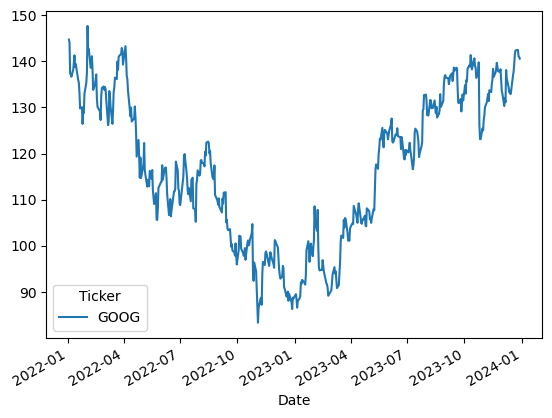

In [13]:
data['Adj Close'].plot()
plt.show()

# Задание

1. Скачайте страницу по адресу https://www.python.org/

Подсчитайте сколько раз в скачанной странице содержатся:
1. Название языка python (без учёта регистра)
2. Подстроки начинающиеся на P (на латинице) и заканчивающихся на n.
3. Открывающие и закрывающие теги <html> …. </html> 
4. Извлеките все года (формат четыре цифры) со страницы.
5. Извлеките все ссылки со страницы, т. е. подстроки удовлетворяющие шаблону: 
	a href="https://..........."   

In [ ]:
import re
import requests


url = "https://www.python.org/"
response = requests.get(url)
content = response.text
python_count = len(re.findall(r'python', content, re.IGNORECASE))
p_n_count = len(re.findall(r'\bP\w*n\b', content))
html_tag_count = len(re.findall(r'<html>|</html>', content, re.IGNORECASE))
years = re.findall(r'\b\d{4}\b', content)
links = re.findall(r'a href="(https://.*?)"', content)

print("1. 'Python' count:", python_count)
print("2. Substrings starting with 'P' and ending with 'n':", p_n_count)
print("3. <html> tag count:", html_tag_count)
print("4. Years found:", set(years))
print("5. Links found:", links)


2. Скачайте данные со страницы сайта https://www.python.org/ с помощью библиотеки (https://pypi.org/project/beautifulsoup4/ ).

* Найдите все теги span с классом text.
* Найдите все теги на странице и вывести их содержимое.
* Найдите элемент с идентификатором ‘banner’ и выведите его содержимое. Для этого потребуется `soup.find(id='banner')`

In [ ]:
import requests
from bs4 import BeautifulSoup


url = "https://www.python.org/"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
span_text_tags = soup.find_all('span', class_='text')
print("1. All <span> tags with class 'text':")
for tag in span_text_tags:
    print(tag.text)
all_tags = soup.find_all()
print("\n2. All tags and their content:")
for tag in all_tags:
    print(tag.name, ":", tag.text.strip())
banner_element = soup.find(id='banner')
print("\n3. Element with id 'banner':")
if banner_element:
    print(banner_element.text.strip())
else:
    print("Element with id 'banner' not found.")


3. Используя библиотеку для скачивания финансовых данных реализуйте параллельное скачивание данных по тикерам ['SBER.ME', 'SBERP.ME', 'SIBN.ME', 'CBOM.ME', 'FIVE.ME', 'CHMF.ME', 'IBM', 'AMZN', 'AAPL', 'GOOG'] начиная с 1 января 2023 года и по 1 января 2025 года. При решении используйте материал предыдущего занятия.

In [ ]:
import yfinance as yf
import pandas as pd
from concurrent.futures import ThreadPoolExecutor


tickers = ['SBER.ME', 'SBERP.ME', 'SIBN.ME', 'CBOM.ME', 'FIVE.ME', 
           'CHMF.ME', 'IBM', 'AMZN', 'AAPL', 'GOOG']
start_date = '2023-01-01'
end_date = '2025-01-01'


def download_stock_data(ticker):
    try:
        data = yf.download(ticker, start=start_date, end=end_date)
        data.to_csv(f"{ticker}.csv")
        print(f"Данные для {ticker} сохранены.")
    except Exception as e:
        print(f"Ошибка при загрузке {ticker}: {e}")


with ThreadPoolExecutor() as executor:
    executor.map(download_stock_data, tickers)

print("Скачивание завершено.")
